Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [6]:
# load the data set '50_Startups.csv'
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# DO EDA ON DATA

In [7]:
df.rename({'R&D Spend':'RD','Marketing Spend':'Marketing_spend'},axis = 1 , inplace = True)

In [8]:
df.head()

,RD,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
df.shape

(50, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD               50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
df.duplicated().sum()

0

In [12]:
# No duplicated values

In [13]:
df.describe()

,RD,Administration,Marketing_spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [14]:
# correlation between the variables
corel = df.corr()
corel

C:\Users\nishitha\AppData\Local\Temp\ipykernel_3852\909167474.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corel = df.corr()


,RD,Administration,Marketing_spend,Profit
RD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [15]:
# We can say that there is a significant correlation between RD and profit

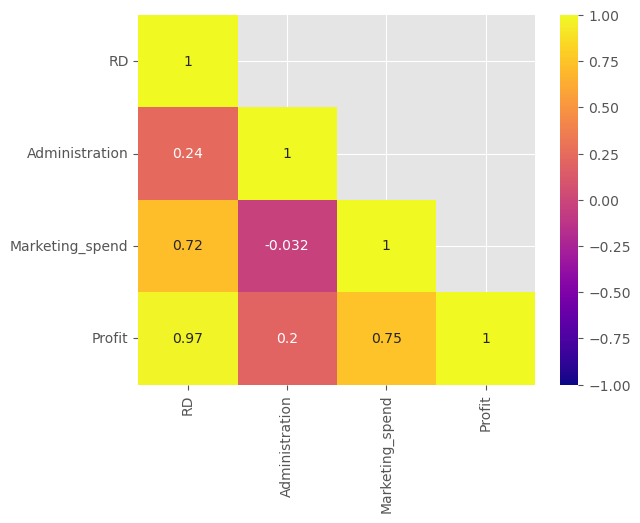

In [16]:
# heat map\
sns.heatmap(data = corel,vmin= -1,vmax = 1,annot = True , mask = np.triu(corel,1),cmap = 'plasma');

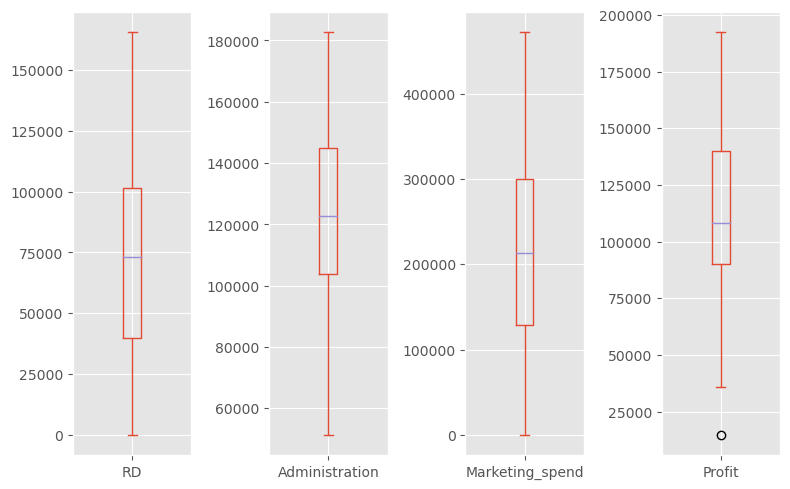

In [17]:
# Outliers detection using Univariate analysis using box plot
df.plot(kind = 'box',subplots = True , figsize = (8,5))
plt.tight_layout();

In [18]:
# Almost no outliers were detected in the data

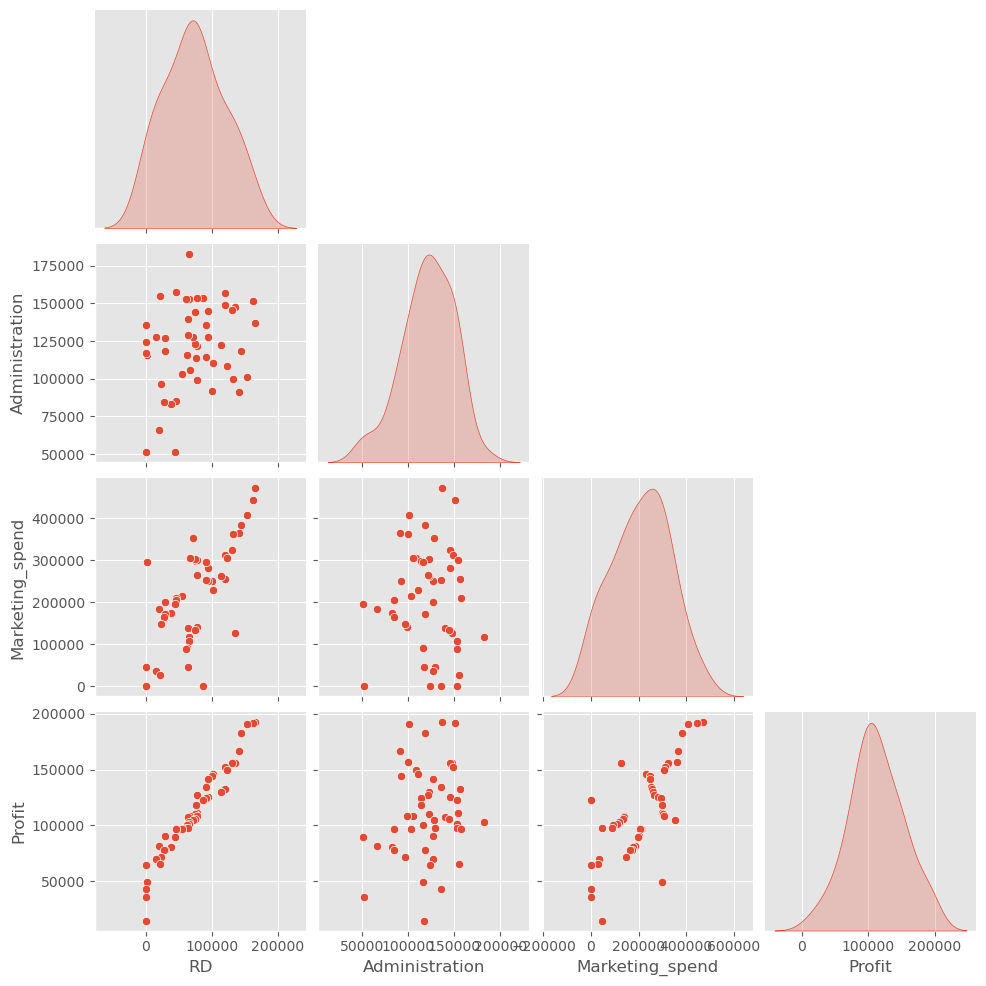

In [19]:
# multivariate analysis using pair plot
sns.pairplot(data = df,diag_kind = 'kde',corner = True);

## Multiple Linear Regression Model using statsmodels library

In [20]:
# import required libraries
from statsmodels.formula.api import ols

In [64]:
# create formula snd fit the model
formula = 'Profit~RD+Administration+Marketing_spend'
first_model = ols(formula = formula,data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     384.8
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           4.53e-31
Time:                        02:28:50   Log-Likelihood:                -481.66
No. Observations:                  47   AIC:                             971.3
Df Residuals:                      43   BIC:                             978.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.768e+04   5797.113     

In [23]:
# The model is giving 95.1 % accuracy and Administration and Markting_spend has p value more than 0.05

## Simple Linear Regression with each independent feature vs the target feature profit

In [24]:
formula = 'Profit~Administration'
model_ad = ols(formula=formula , data = df).fit()
print(model_ad.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 31 Oct 2023   Prob (F-statistic):              0.162
Time:                        01:49:11   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.

In [25]:
# Administration is having insignificant p_value

In [26]:
formula = 'Profit~Marketing_spend'
model_mk = ols(formula = formula,data = df).fit()
print(model_mk.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           4.38e-10
Time:                        01:52:16   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530     

In [27]:
# Marketing spend has significan tp value

# Build a multiple linear regression model with Administration and marketing_spend

In [28]:
formula = 'Profit~Administration+Marketing_spend'
model_admk = ols(formula=formula,data = df).fit()
print(model_admk.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           2.50e-10
Time:                        01:54:54   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04     

In [29]:
# When we use both features we dont have insignificant p value , we can consider all features for model building

In [30]:
# calculate VIF for each independent variable
# importing variacnce influation factor from stats models
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
# Here State has no value, remove state from the data frame
df.drop('State',axis = 1 , inplace =True)

In [41]:
Vif = pd.DataFrame()
Vif['VIFFactor']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
Vif['features']=df.columns
Vif.round(1)

,VIFFactor,features
0,30.2,RD
1,13.4,Administration
2,9.8,Marketing_spend
3,79.6,Profit


In [42]:
# Administration and marketing spend has low variance influation factor

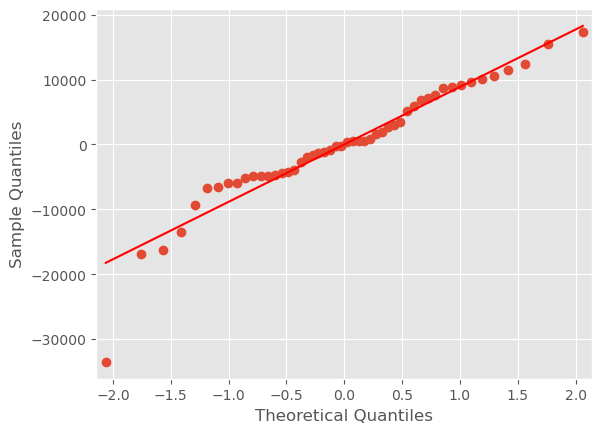

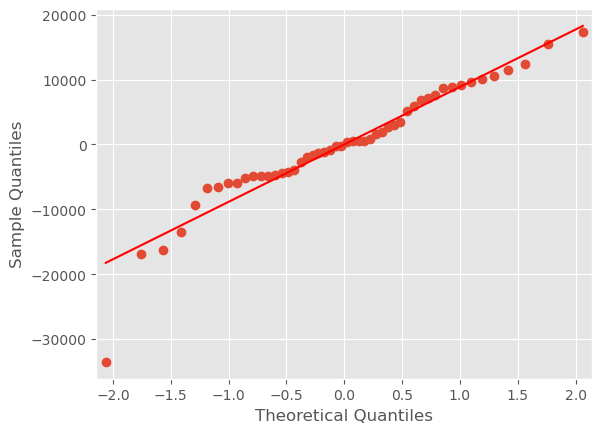

In [43]:
# check for the normality of the residuals - qqplot
from statsmodels.api import qqplot
qqplot(model.resid,line = 's')

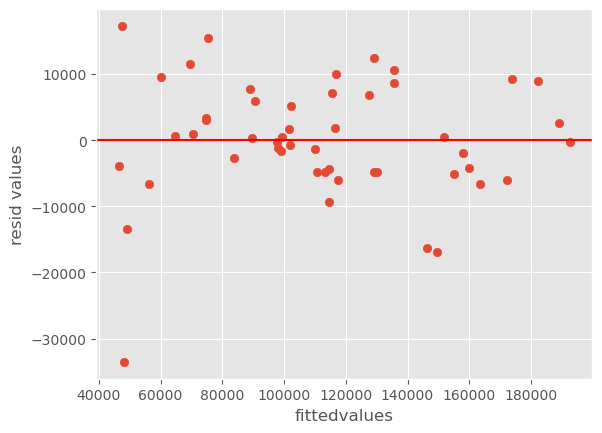

In [44]:
# check for homoscedasticity - residuals vs fitted values
plt.scatter(model.fittedvalues,model.resid)
plt.xlabel('fittedvalues')
plt.ylabel('resid values')
plt.axhline(y=0,color='r',linestyle='-');

In [45]:
# Observation deletion diagnostics - detect influential observations
# get cook's distance
model_influence = model.get_influence() # influence object
(c,_)=model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

In [46]:
# thumb rule for cook's distance - if cooks distance > 4/n, then the data point is influential
4/df.shape[0]

0.08

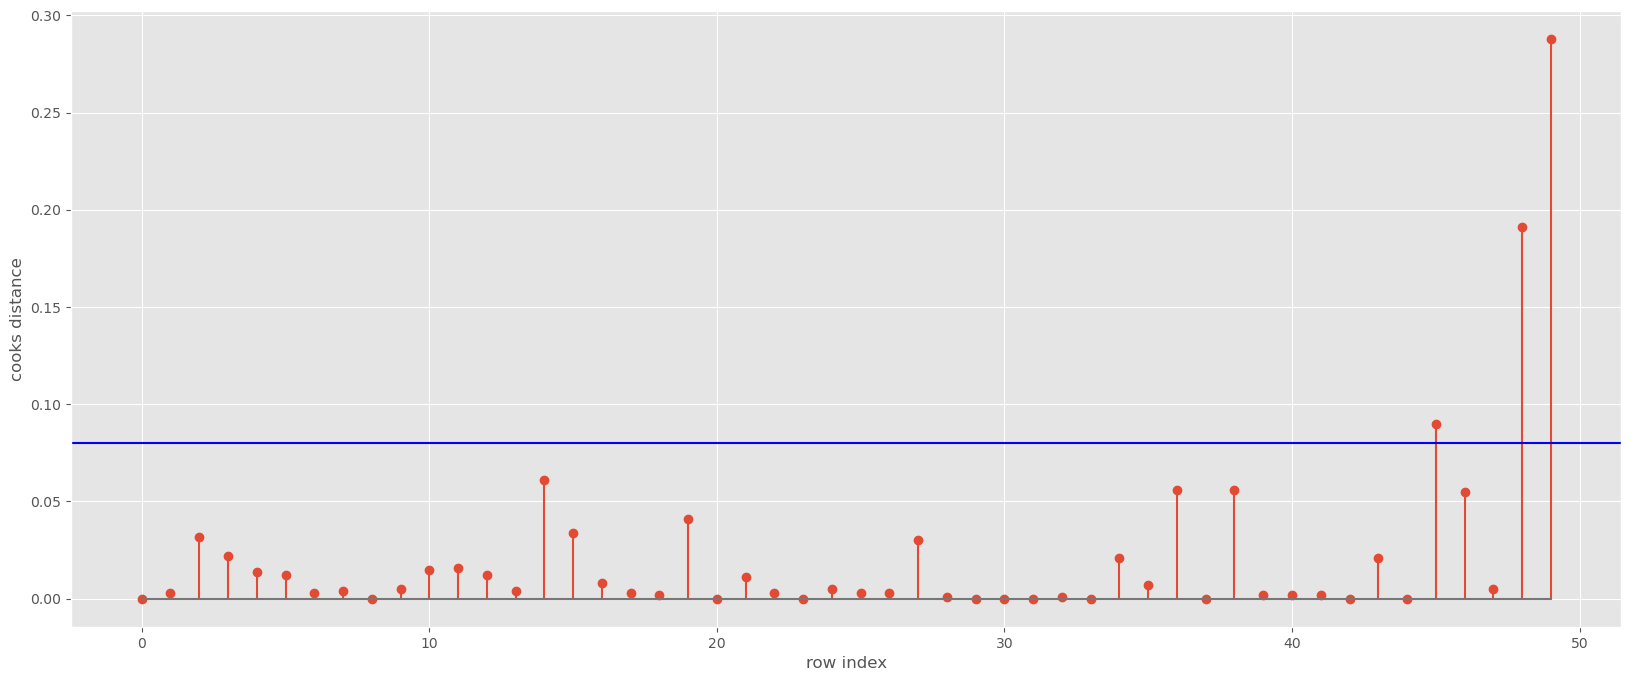

In [47]:
# plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.axhline(y=0.08,color='blue',linestyle='-');

In [48]:
# check which data points are influencers
cgreater = c>0.08
cgreater

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True])

In [49]:
# get the index of elements of cgreater where cgreater is True
idx_new = np.where(cgreater)
idx_new

(array([45, 48, 49], dtype=int64),)

In [50]:
# drop the 45,48,49 rows from the data
df.drop([45,48,49],axis = 0 ,inplace = True)

In [51]:
df.shape

(47, 4)

In [52]:
new_df = df.copy()

In [53]:
new_df.head()

,RD,Administration,Marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [54]:
new_df.shape

(47, 4)

In [62]:
# create formula snd fit the model
formula = 'Profit~RD+Administration+Marketing_spend'
final_model = ols(formula = formula,data = new_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     384.8
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           4.53e-31
Time:                        02:27:58   Log-Likelihood:                -481.66
No. Observations:                  47   AIC:                             971.3
Df Residuals:                      43   BIC:                             978.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.768e+04   5797.113     

In [56]:
# Now the model performance increased from 95.1% to 96.4%

In [58]:
# predicted values
final_model.predict(new_df)

0     189966.573276
1     186297.911272
2     181485.610512
3     172661.465059
4     172251.753910
5     163512.599561
6     157958.889847
7     158568.687907
8     150360.088419
9     154992.860416
10    136309.911633
11    136931.010932
12    129259.400240
13    127308.054785
14    148279.749256
15    146231.095943
16    117306.529624
17    129419.023599
18    129317.818633
19    116658.121133
20    117087.434326
21    116271.338984
22    114817.157691
23    110788.759738
24    115469.416036
25    103010.751494
26    111123.352603
27    113994.261092
28    100977.240925
29    102283.591907
30    101466.475901
31     98369.982126
32    100824.219174
33     99574.921181
34     88812.638788
35     92996.106255
36     76437.373257
37     93425.337359
38     73294.182145
39     86584.524517
40     76481.564957
41     77779.746872
42     73337.474981
43     62626.399877
44     66045.896572
46     57325.451065
47     49068.314221
dtype: float64

In [70]:
data = [['First_model',95.1],['Final_model',96.4]]

In [71]:
r2_df = pd.DataFrame(data,columns=['model','r2value'])

In [72]:
r2_df

,model,r2value
0,First_model,95.1
1,Final_model,96.4
